In [3]:
import nibabel
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [4]:
B_mri = nibabel.load("../data/00495/BraTS2021_00495_t1.nii.gz")
B_data = B_mri.get_fdata()

In [5]:
S_mri = nibabel.load("../data/00495/BraTS2021_00495_seg.nii.gz")
S_data = S_mri.get_fdata()

In [6]:
scaler = MinMaxScaler()

In [7]:
def show_slice(vol, seg_vol, idx):
    assert vol.shape == seg_vol.shape

    slice = vol[:,:,idx]
    seg_slice = seg_vol[:,:,idx]
    
    _, ax = plt.subplots(1, 2)
    ax[0].imshow(slice, cmap="gray")
    ax[1].imshow(seg_slice)
    plt.show()

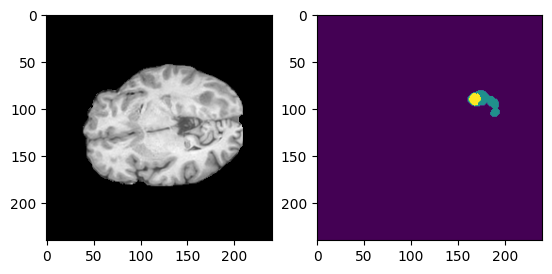

In [8]:
show_slice(B_data, S_data, 69)

In [ ]:
B_data_cropped = B_data[56:184, 56:184, 13:141]
S_data_cropped = S_data[56:184, 56:184, 13:141]
show_slice(B_data_cropped, S_data_cropped, 60)

In [9]:
slice = B_data[:,:,80]
print("Before Normalizing")
print(np.min(slice), np.max(slice))

slice = scaler.fit_transform(slice.reshape(-1, slice.shape[-1])).reshape(slice.shape)

print("After Normalizing")
print(np.min(slice), np.max(slice))

Before Normalizing
0.0 4234.0
After Normalizing
0.0 1.0


### Checking the label values

In [10]:
np.unique(S_data)

array([0., 1., 2., 4.])

In [11]:
S_data[S_data==4] = 3

In [12]:
np.unique(S_data)

array([0., 1., 2., 3.])

In [13]:
val, c = np.unique(S_data[:,:,67], return_counts=True)
if (1 - (c[0]/c.sum())) > 0.001:  #At least 0.1% useful volume with labels that are not 0
    print("There is some data")
else:
    print("There is no data")

There is some data


### Creating a multichannel slice

In [14]:
t2_mri = nibabel.load("../data/00495/BraTS2021_00495_t2.nii.gz")
t2_data = t2_mri.get_fdata()

t1ce_mri = nibabel.load("../data/00495/BraTS2021_00495_t1ce.nii.gz")
t1ce_data = t1ce_mri.get_fdata()

t2_mri = nibabel.load("../data/00495/BraTS2021_00495_t2.nii.gz")
t2_data = B_mri.get_fdata()


In [27]:
def to_categorical(y, num_classes, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape

    y = y.reshape(-1)
    assert num_classes is not None
    num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

In [28]:
to_categorical(S_data, 4).shape

(240, 240, 155, 4)